<a href="https://colab.research.google.com/github/chitransh0052/Machine-learning/blob/main/fraud_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [ ]:
data=pd.read_csv('/content/fraudTrain.csv')

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
data.shape

(1296675, 23)

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.isnull()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
print("categorical_features:\n", categorical_features)

categorical_features:
 Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

if len(categorical_features) > 0:
    for feature in categorical_features:
      encoder=LabelEncoder()
      data[feature] = encoder.fit_transform(data[feature])


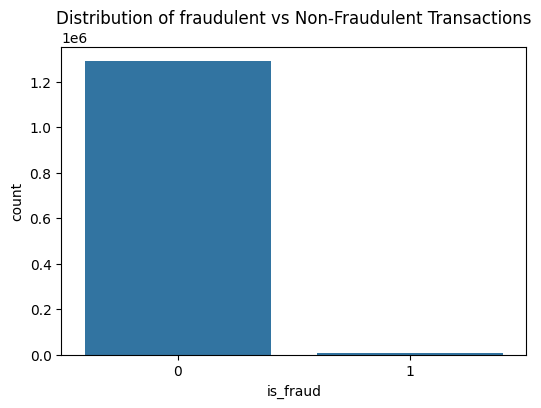

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud',data=data)
plt.title('Distribution of fraudulent vs Non-Fraudulent Transactions')
plt.show()

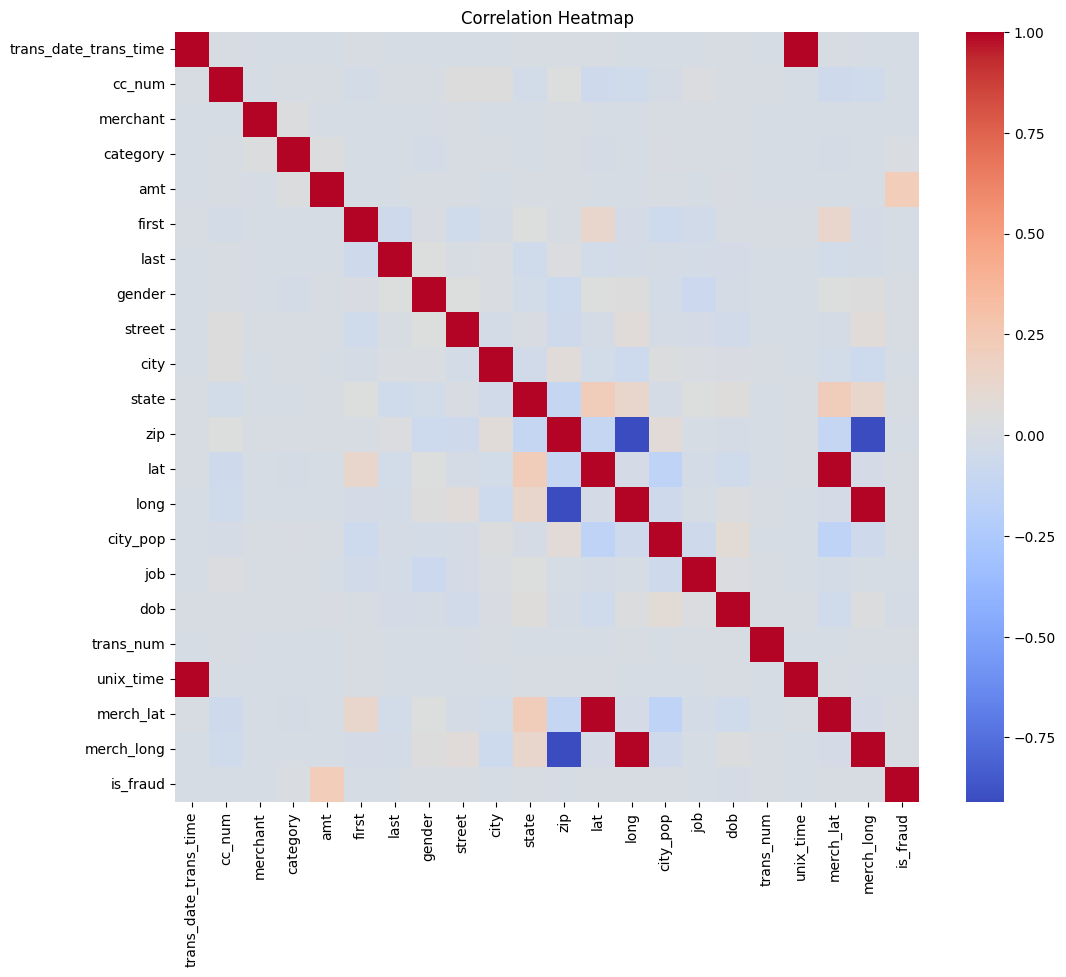

In [ ]:
# Correlation heatmap
correlation = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation,cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# select features with the hogh  correlation to 'isFraud'
target_corr = correlation['is_fraud'].sort_values(ascending=False)
print("feature most correlation with id fraud:\n",target_corr.head())

feature most correlation with id fraud:
 is_fraud    1.000000
amt         0.219404
category    0.020205
gender      0.007642
city_pop    0.002136
Name: is_fraud, dtype: float64


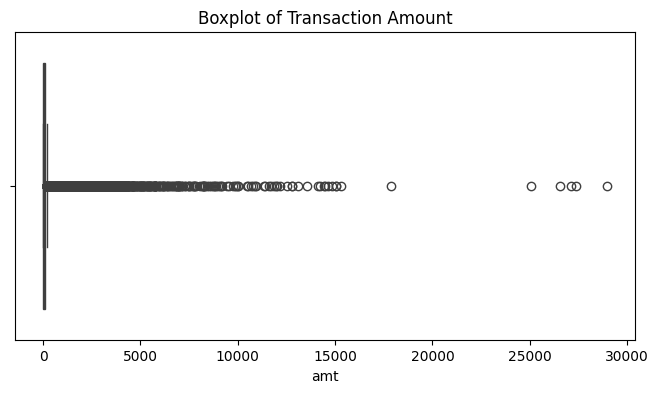

In [ ]:
#Boxplot for 'Transaction'
plt.figure(figsize=(8,4))
sns.boxplot(x=data['amt'])
plt.title('Boxplot of Transaction Amount')
plt.show()

In [ ]:
import numpy as np
# handling outlier (if needed)
Q1 = data ['amt'].quantile(0.25)
Q3 = data ['amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['amt']= np.where(data['amt']<lower_bound,lower_bound,data['amt'])
data['amt']= np.where(data['amt']>upper_bound,upper_bound,data['amt'])

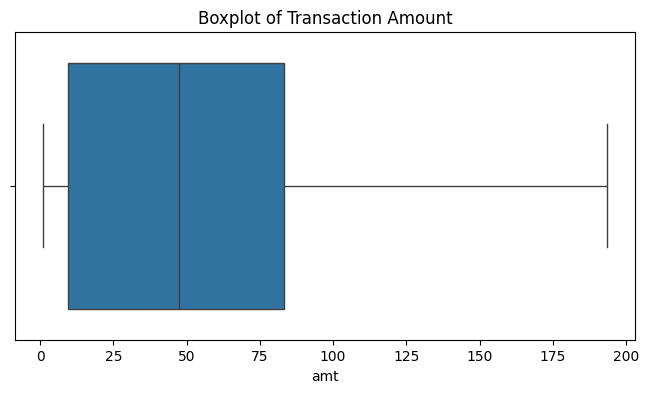

In [ ]:
#Boxplot for 'Transaction'
plt.figure(figsize=(8,4))
sns.boxplot(x=data['amt'])
plt.title('Boxplot of Transaction Amount')
plt.show()

In [ ]:
y=data['is_fraud']
data.drop("is_fraud",axis=1,inplace=True)
x=data

In [ ]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
print(f"Training set shape: {x_train.shape},Test set shape: {x_test.shape}")


Training set shape: (1037340, 21),Test set shape: (259335, 21)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# select model for training
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# select model for training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42) # Instantiated the model with desired parameters
model.fit(x_train,y_train) # Trained the model
y_pred = model.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also get other metrics like precision, recall, F1-score etc using classification_report
print(classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

Accuracy: 0.9972930765226444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.56      0.71      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.78      0.85    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
